## 1) Problem Statement

##### . This projects understands how the student's performance (test score) is affected by other variable such as Gender,Ethnicity,patrental level of education lunch and test preprayion course.  



## 2) Import Data and Required Package

#### Importing Pandas, Numpy, Matplotlib, Seaborn and warnings Library

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import the CSV Data as Pandas DataFrame 

In [2]:
df = pd.read_csv("stud.csv")

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape Of Datasets

In [4]:
df.shape

(1000, 8)

#### Dataset Information

## 3) Data check to performance

### 3.1 Check Missing Values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There is no miising values in dataset

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

#### There is no duplicates in the dataset

### 3.3 Check data types

In [7]:
# check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each Column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

### 3.6 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [12]:
# Define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding column for  "Total Score" and "Average"

In [13]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()


print(f'Number of student with full marks in Reading: {reading_full}')
print(f'Number of student with full marks in Writing: {writing_full}')
print(f'Number of student with full marks in Maths: {math_full}')

Number of student with full marks in Reading: 17
Number of student with full marks in Writing: 14
Number of student with full marks in Maths: 7


In [15]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_full_20 = df[df['writing_score'] <=20]['average'].count()
math_full_20 = df[df['math_score'] <=20]['average'].count()

#### Insight

## 4) Exploring Data (Visualization)

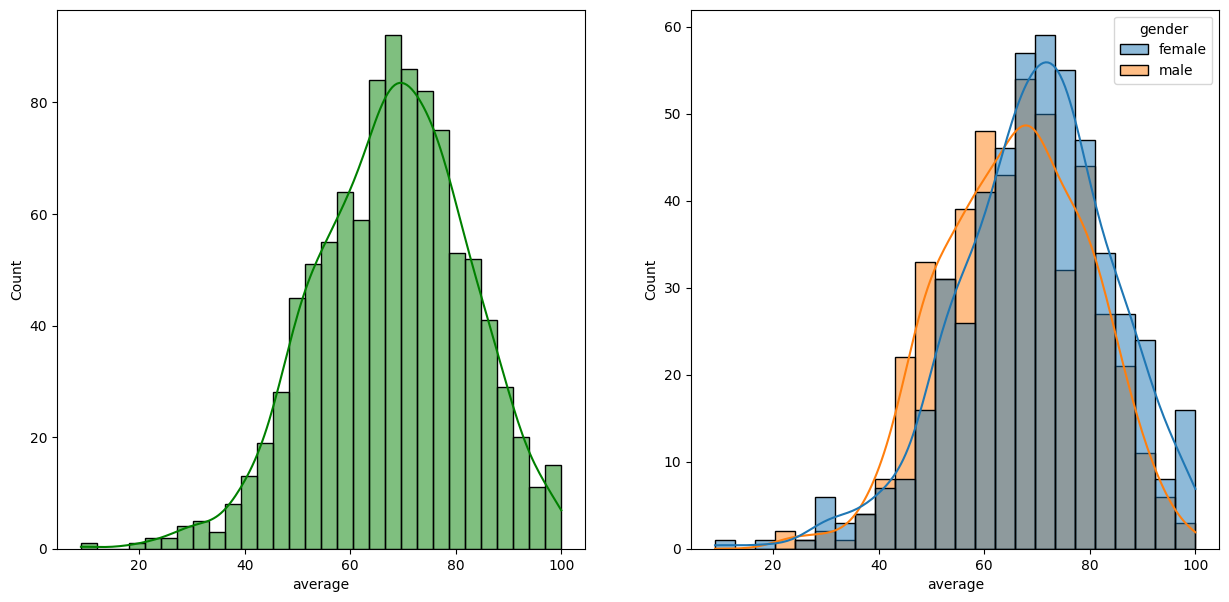

In [16]:
# Visulazing average score distribution to make some conclution

fig, axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x="average",bins=30,kde=True,color="g",ax=axs[0])
sns.histplot(data=df,x="average",kde=True,hue="gender",ax=axs[1])
plt.show()

#conclusion

#Female students tend to performe well then male students

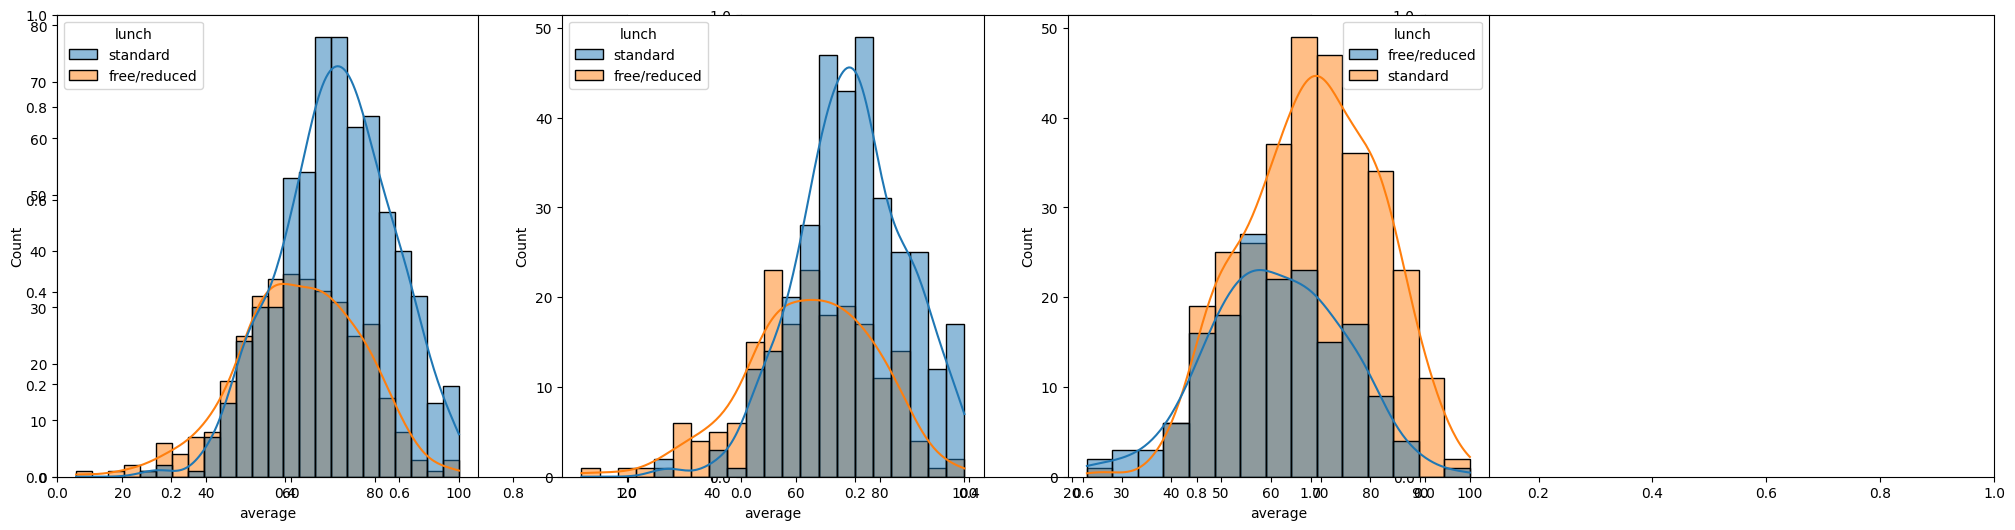

In [17]:
#Visualizing lunch if it helps score good grades or not

plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = "average", kde = True, hue = "lunch")
plt.subplot(142)
sns.histplot(data = df[df.gender == "female"], x = "average", kde = True, hue = "lunch")
plt.subplot(143)
sns.histplot(data = df[df.gender=="male"], x = "average", kde = True, hue = "lunch")
plt.show()


# Conclusion:

# We can conclude by looking at the graph that standard lunch helps students score good wheather male or female

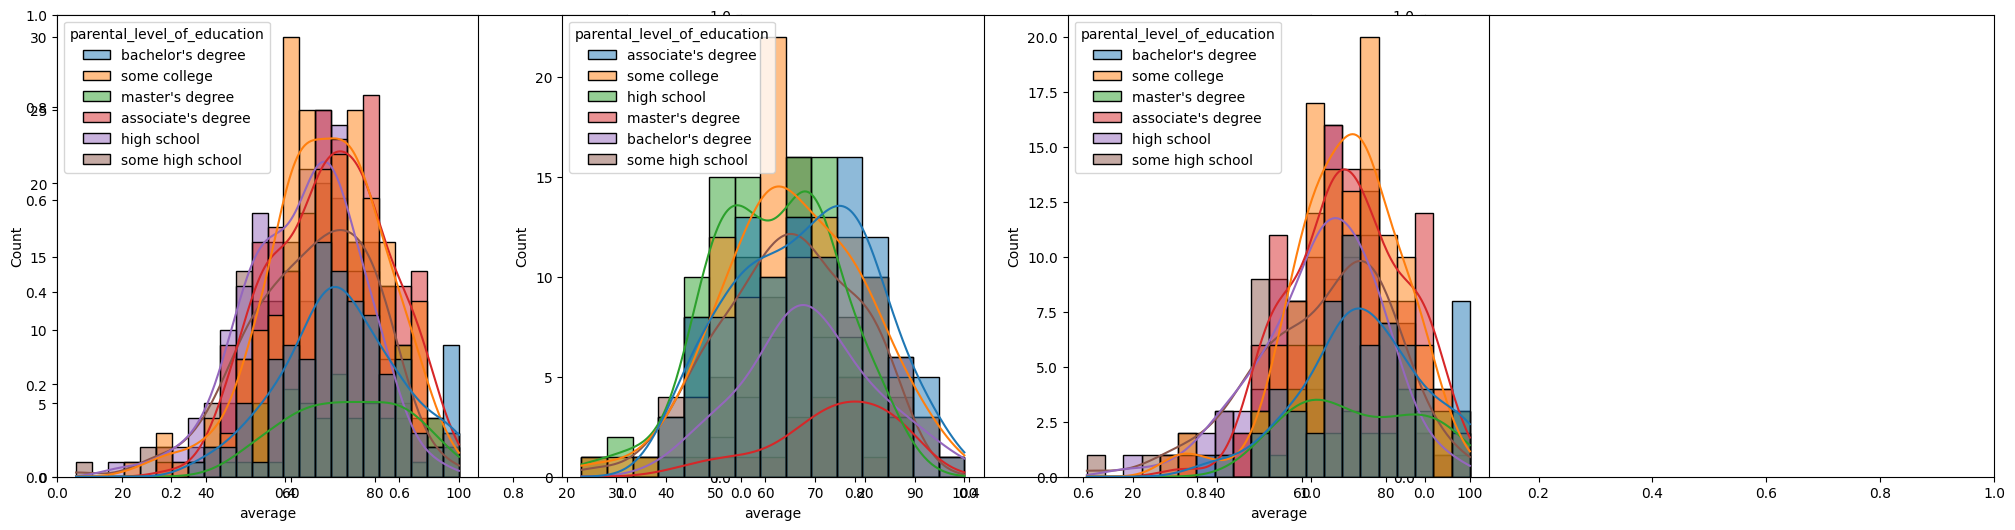

In [18]:
# Visualizing if parental education effects child education


plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = "average", kde = True, hue = "parental_level_of_education")
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == "male"], x = "average", kde = True, hue = "parental_level_of_education")
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == "female"], x = "average", kde = True, hue = "parental_level_of_education")
plt.show()


# Conclusion:

# By looking at the graph we can conclude that parent education does not matter or depends on their childrens education.

<Axes: title={'center': 'WRITING SCORE'}, ylabel='writing_score'>

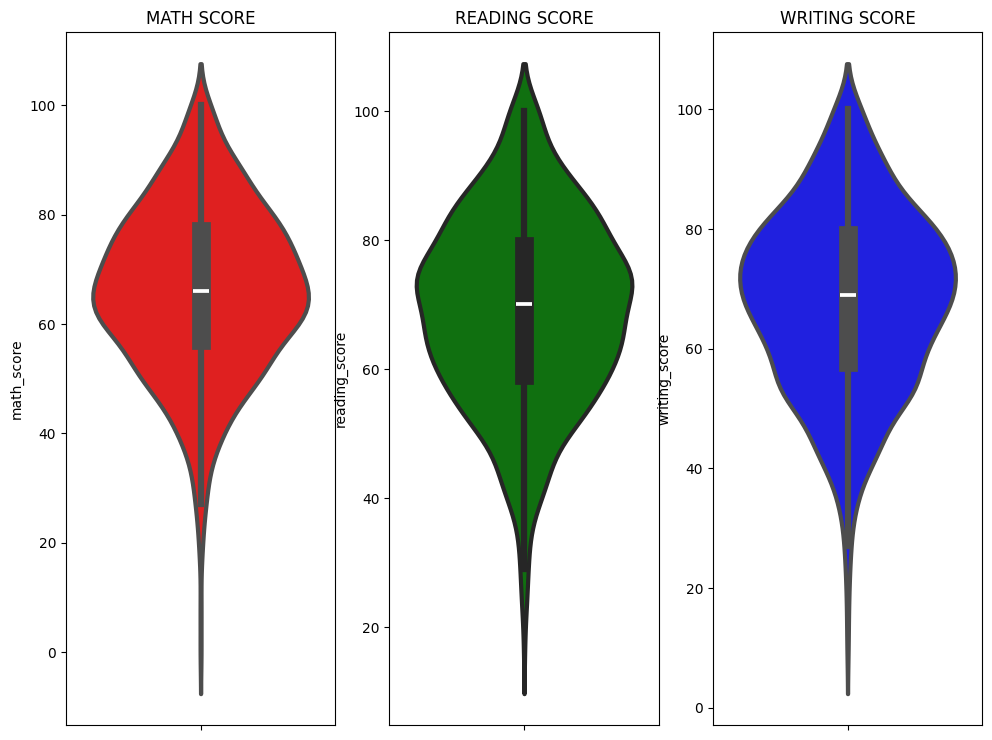

In [19]:
# Maximum score of students based in all three subjects

plt.figure(figsize = (16,9))
plt.subplot(1,4,1)
plt.title("MATH SCORE")
sns.violinplot(y = "math_score", data = df, color = "red", linewidth = 3)
plt.subplot(1,4,2)
plt.title("READING SCORE")
sns.violinplot(y = "reading_score", data = df, color = "green", linewidth = 3)
plt.subplot(1,4,3)
plt.title("WRITING SCORE")
sns.violinplot(y = "writing_score", data = df, color = "blue", linewidth = 3)


# conclusion

# From the above three plots its clear that most of the student scores in between 60 - 80 in Maths wheras in reading 
# and writing most of them score from 50 - 60

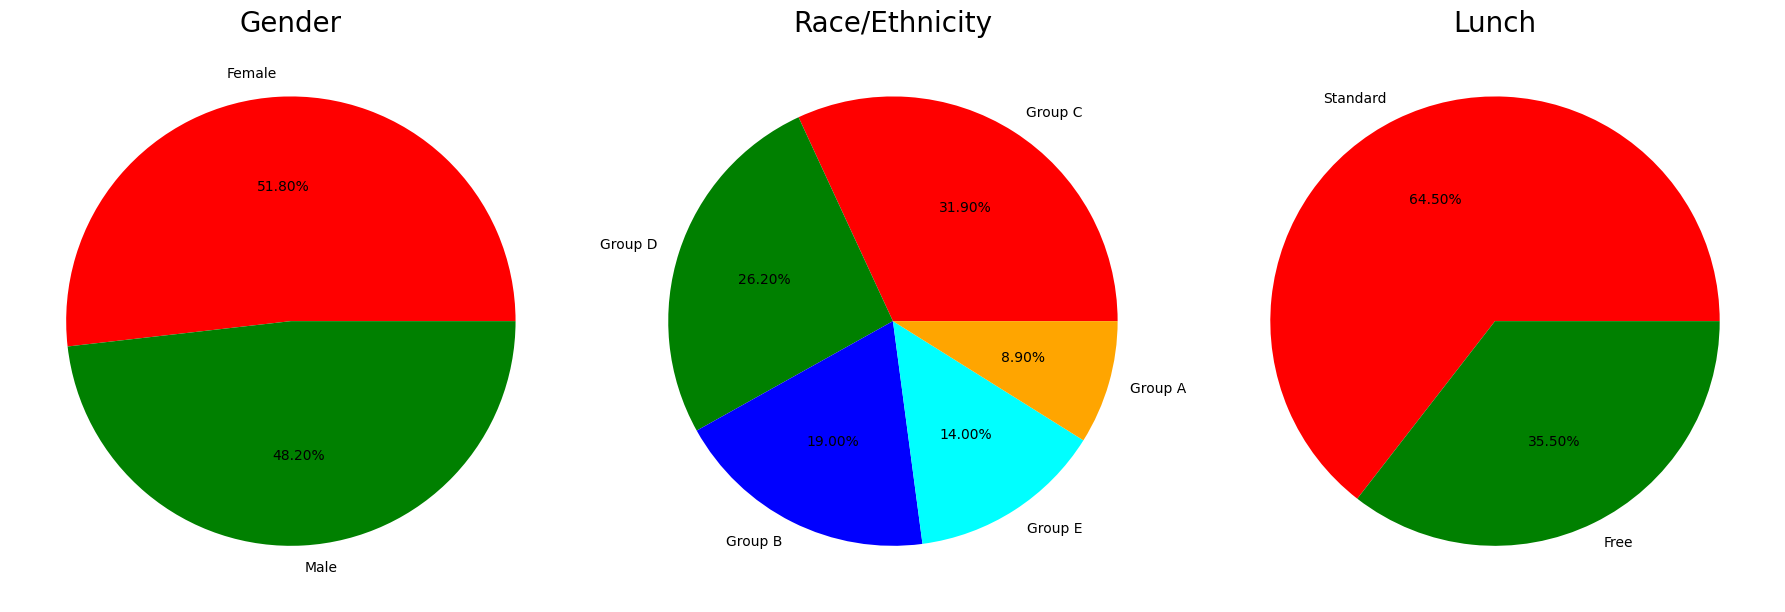

In [20]:
plt.rcParams["figure.figsize"] = (30, 12)

plt.subplot(1, 5, 1)
size = df["gender"].value_counts()
labels = ["Female", "Male"]
colors = ["red", "green"]
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Gender", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 2)
size = df["race_ethnicity"].value_counts()
labels = ["Group C", "Group D", "Group B", "Group E", "Group A"]
colors = ["red", "green", "blue", "cyan", "orange"]
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Race/Ethnicity", fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 3)
size = df["lunch"].value_counts()
labels = ["Standard", "Free"]
colors = ["red", "green"]
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title("Lunch", fontsize=20)
plt.axis("off")

plt.tight_layout()
plt.show()

In [21]:
# Gender Column (Univarte visualizing)

# How is gender distributed
# Does gender have any influnce on student perform

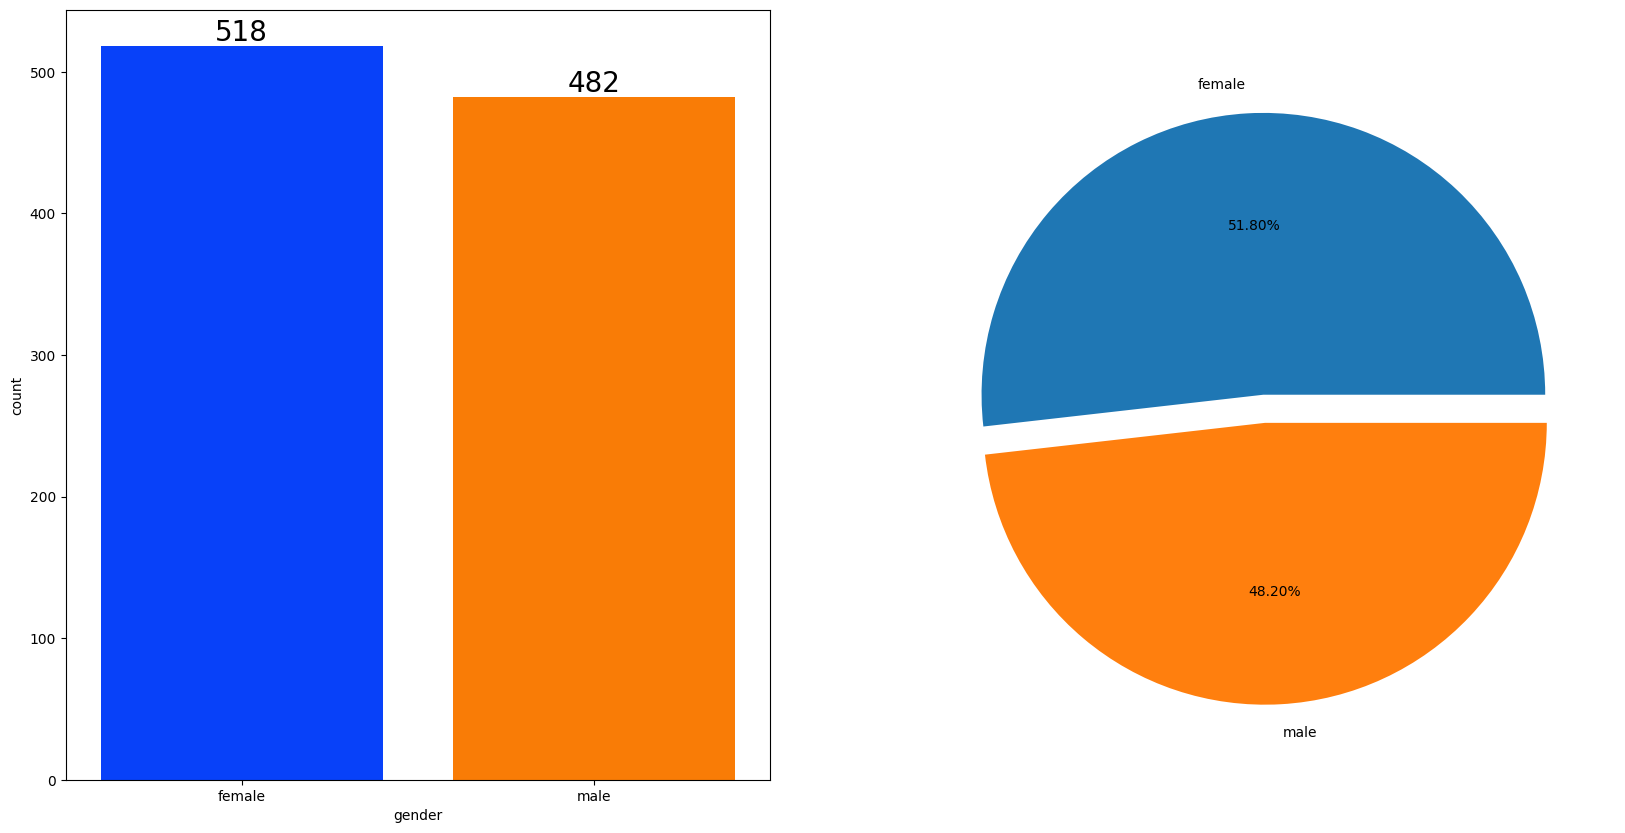

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x="gender", data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)


gender_counts = df["gender"].value_counts()
ax[1].pie(x=gender_counts,labels=gender_counts.index,  explode=[0, 0.1],autopct="%.2f%%")
plt.show()


# conclusion

# Gender has balanced data with female student are 518(48%) and male students are 48.2(52%)

In [23]:
# Race/Ehnicity column

# How is Group wise distrubution 
# Is race/ethnicity has any impact on student's performance

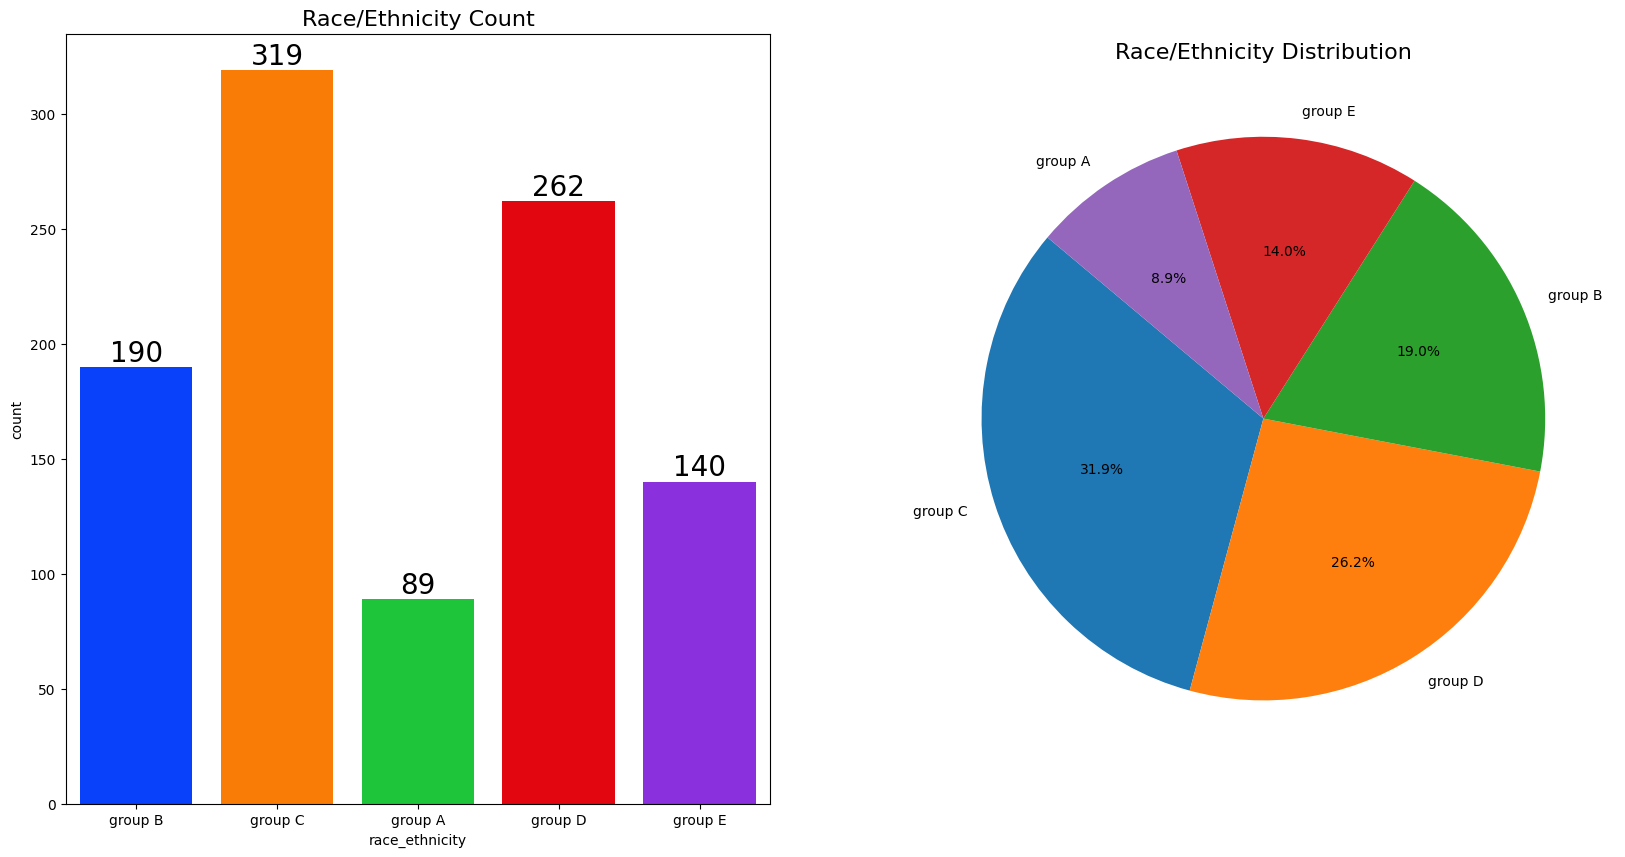

In [24]:
# Race/Ehnicity column( univariate )


f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df["race_ethnicity"], palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)
ax[0].set_title("Race/Ethnicity Count", fontsize=16)


race_counts = df["race_ethnicity"].value_counts()
ax[1].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title("Race/Ethnicity Distribution", fontsize=16)

plt.show()